# **Análise dos Preço das Ações das Cias Aéreas Brasileiras na Pandemia COVID-19** 

<left><img src="https://www.melhoresdestinos.com.br/wp-content/uploads/2020/04/avioes-azul-gol-latam-capa2019-01.jpg" height=260px></left> 
<right><img src="https://www.blogdovestibular.com/wp-content/uploads/2020/06/melhores-acoes-bolsa-de-valores-1200x675.jpg" height=260px></right>

### O objetivo deste notebook é o de analisar o impacto que as três maiores Cias Áerea Brasileiras (Azul, Gol e Latam) sofreram no período inicial da pandemia do COVID-19 com o cancelamento dos voos e fechamento das fronteiras aéreas.

### Para isso, vamos analisar a variação no valor das ações comercializadas na Bolsa de Valores de *New York* (NYSE) através da biblioteca **yfinance**, observando o movimento financeiro um pouco antes que as medidas de contenção da pandemia entrasse em vigor neste país (metade de março de 2020).

---

Este notebook faz parte dos meus estudos inciais em ciência de dados. Não tenho a pretensão de verificar se este é o momento, ou não, para comprar ações destas cias aérea. Alias, nem investidor eu sou! Também não pretendo influenciar ninguém neste sentido. Como eu trabalho com aviação, apenas quis fazer algo em relação a esta área.

In [ ]:
# Instalando o yfinance
!pip install yfinance

In [ ]:
# Importando a biblioteca yfinance depois da instalação. Bem simples de utilizar, assim como sua documentação.
# As Açoes se referem à bolsa americana sendo, os valores em USD.
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

1. Importando as ações objeto do meu estudo pelo yfinance (apenas 2 linhas de código) e definindo o período desejado.
   Maiores Informações sobre a biblioteca yfinace [clique aqui](https://pypi.org/project/yfinance/). Você também pode conferir este artigo do Ritvik Kharkar [clicando aqui](https://towardsdatascience.com/how-to-get-stock-data-using-python-c0de1df17e75)
2. Optei pelas ações da Cias Aéreas Azul, Gol e Latam (LTM).
3. Ações dia a dia (período = 1d mas há outras opções) no período de 01 de janeiro à 12 de agosto de 2020 (padrão americano yyyy-mm-dd).

In [3]:
tickers = yf.Tickers('azul gol ltm')
tickerdf = tickers.history(period='1d', start='2020-1-1', end='2020-8-13')
tickerdf

[*********************100%***********************]  3 of 3 completed


Close                        ...   Volume                  
                 AZUL        GOL        LTM  ...     AZUL      GOL      LTM
Date                                         ...                           
2020-01-02  43.590000  18.440001  10.094358  ...   532300   733800  1979891
2020-01-03  42.040001  17.670000   9.834045  ...   431200   800700  1250875
2020-01-06  40.450001  16.850000   9.506244  ...   431200  1054800  1436320
2020-01-07  41.700001  16.940001   9.323061  ...   556500   589600   682874
2020-01-08  42.040001  17.740000   9.429114  ...   633800  1297900  1518208
...               ...        ...        ...  ...      ...      ...      ...
2020-08-06  11.960000   6.910000   1.690000  ...  1509600  1215900   424862
2020-08-07  11.620000   6.550000   1.640000  ...  1246300   672700   324475
2020-08-10  11.920000   6.550000   1.675000  ...  2074500  1343100   573333
2020-08-11  12.890000   7.120000   1.750000  ...  4231000  2758300   998616
2020-08-12  12.450000   6.830000   1.680000  ...  4354400  2394900   207273

[155 rows x 21 columns]

Após a importação dos dados, vemos que temos 155 linhas com 21 colunas. O dataframe possui 6 (seis) colunas (3 em _Dividends_ e 3 em _Stock Splits_) sem valores que não servirão para a condução das análises e por este morivo serão deletadas do dataframe.

Serão utilizadas somente os valores das colunas _**Volume**_ e _**Close**_. As colunas _Open_, _High_, _Low_, _Dividends_ e _Stock Splits_ pois não serão utilizadas de acordo com o objetivo desta análise.

In [4]:
# exluindo colunas Dividends e Stock Splits
tickerdf.drop(['Open', 'High', 'Low','Dividends', 'Stock Splits'], axis=1, inplace = True)
tickerdf.head()

Close                        Volume                  
                 AZUL        GOL        LTM    AZUL      GOL      LTM
Date                                                                 
2020-01-02  43.590000  18.440001  10.094358  532300   733800  1979891
2020-01-03  42.040001  17.670000   9.834045  431200   800700  1250875
2020-01-06  40.450001  16.850000   9.506244  431200  1054800  1436320
2020-01-07  41.700001  16.940001   9.323061  556500   589600   682874
2020-01-08  42.040001  17.740000   9.429114  633800  1297900  1518208

## Significado de cada coluna:

*   **`Close:`** valor da ação no final do dia.
*   **`High:`** o maior valor que a ação atingiu no dia.
*   **`Low:`** o menor valor que a ação atingiu no dia.
*   **`Open:`** valor da ação no início do dia.
*   **`Volume:`**  quantas ações foram negociadas naquele dia.






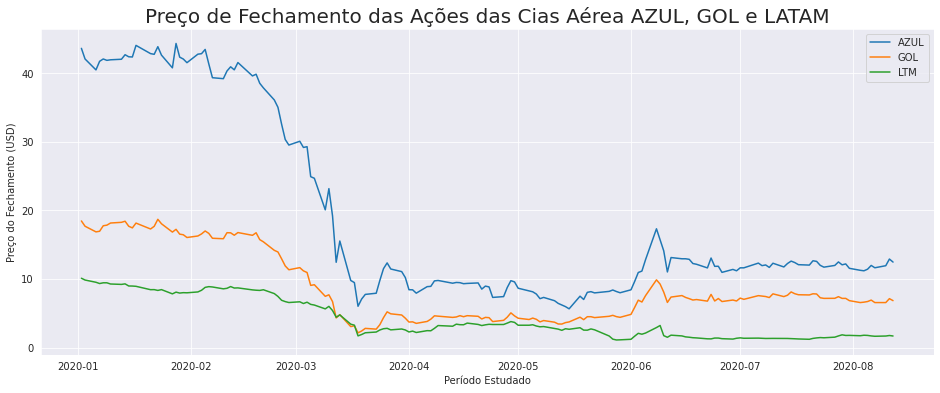

In [5]:
# Plotando o gráfico referente ao preço de fechamento das ações
fig,ax = plt.subplots(figsize=(16,6))
plt.plot(tickerdf.index, tickerdf.Close);
plt.title('Preço de Fechamento das Ações das Cias Aérea AZUL, GOL e LATAM', fontsize=20)
plt.ylabel('Preço do Fechamento (USD)')
plt.xlabel('Período Estudado')
plt.legend(tickerdf.Close)
plt.show()

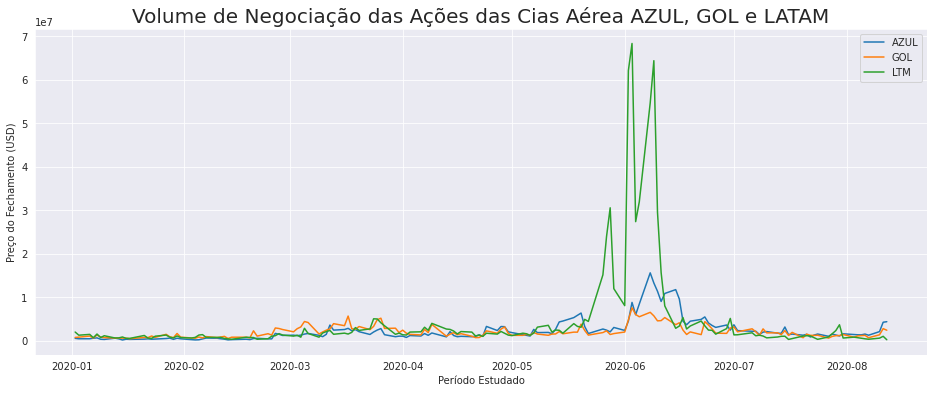

In [6]:
# Plotando o gráfico referente ao volume de negociação das ações
fig,ax = plt.subplots(figsize=(16,6))
plt.plot(tickerdf.index, tickerdf.Volume);
plt.title('Volume de Negociação das Ações das Cias Aérea AZUL, GOL e LATAM', fontsize = 20)
plt.ylabel('Preço do Fechamento (USD)')
plt.xlabel('Período Estudado')
plt.legend(tickerdf.Volume)
plt.show()

##**Análise dos Dados**

*   Percebemos através dos gráficos que o preço das ações veem caindo desde o início de janeiro até o momento, mesmo apresentando um esboço de reação no final de março e início de junho.
*   A maior queda no preço das ações ocorreu na metade do mês de maio que foi quando iniciou-se a quarentena decretada pelos governos dos estados de São Paulo e Rio de Janeiro e, por consequência, diminuição drástica (quase total) dos voos.
*   As ações da Cia Azul foi a que mais desvalorizou no período estudado.
*   As ações das Cia Latam foi a que apresentou maior volume de negociação a partir do final do mês de abril, porém, não teve aumento no valor das ações.
*   No início de agosto houve um "esboço" de recuperação nos valores das ações.
*   Com um impacto financeiro grande nos preços das ações e nos cancelamentos quase que na sua totalidade dos voos, como está as situações dos empregados? Bom, houve muitos demitidos por parte da Azul e Latam (é só olhar a quantidade de posts de despedidas [leia-se demissões] no Linkein). A Gol, através de acordos, conseguiu manter a maioria dos funcionários. 


Sempre ouvi dizer que as Cias Aéreas sempre se recuperam logo financeiramente depois de uma "queda", mas neste caso atípico em que estamos vivemos, como é possível se recuperar se vc é impedido de prestar o seu serviço por tanto tempo? As aeronaves podem estar paradas no chão mas precisam de manutenção. Bom, nem consigo falar das pessoas que perderam seus empregos ou, mantendo o emprego, tiveram seus salários reduzidos. Como será que eles estão vivendo nestes tempos? Bom, talvez isso seja assunto para uma pesquisa...


Com a grande maioria dos voos cancelados por um bom período, há muita incerteza sobre a volta à normalidade das operações e, por consequência, sobre a retomada financeira. Acredita-se que logo (até o fim do ano) teremos os voos regionais tendendo a voltar a sua normalidade mas o mesmo talvez não possa ser dito sobre os voos internacionais, pois depende da política de cada país. 


Temos ainda que considerar a recuperação econômica e a mudança cultural que as empresas sofreram (muitas delas forçadas) por conta do isolamento. Houve uma mudança na relação de trabalho, principalmente na questão do trabalho presencial x remoto, e hoje o _`home office`_ é uma realidade, e que deu certo, para muitas empresas. 